## Nickhil Tekwani || CS 6220 || HW3B tSNE, Feature Selection, Image HAAR Features

### PROBLEM 1: tSNE dim reduction


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

mnist = fetch_openml('mnist_784', version=1)
mnist_data, mnist_labels = mnist.data, mnist.target

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_features=2000)  # Limit features for better performance
newsgroups_data = vectorizer.fit_transform(newsgroups.data).todense()
newsgroups_labels = newsgroups.target


/usr/local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

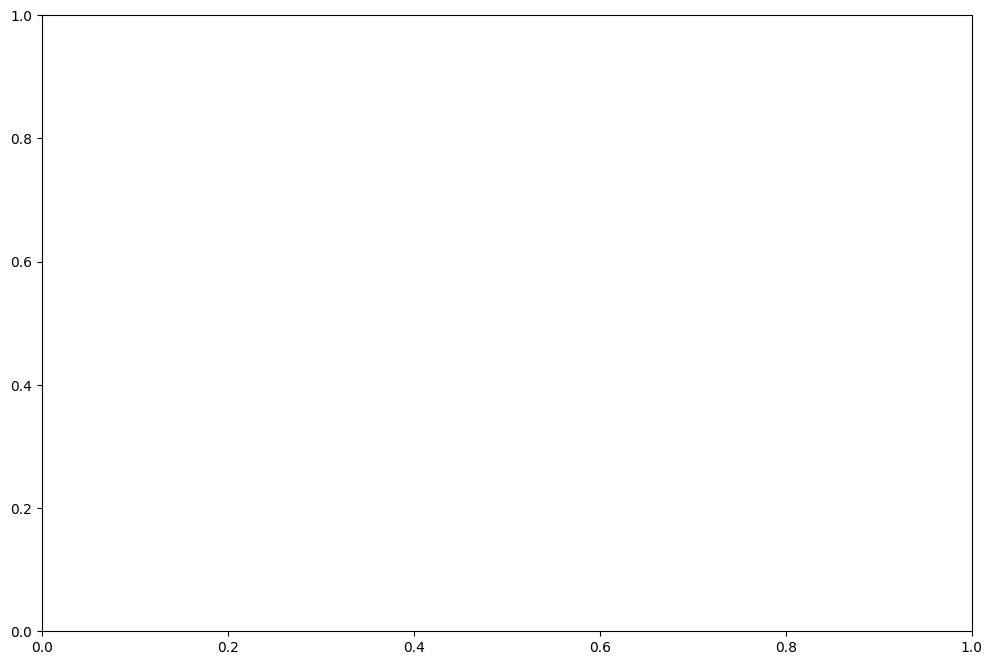

In [6]:
# run tsne 
def run_tsne_and_plot(data, labels, perplexities, n_components=2, dataset_name=''):
    for perplexity in perplexities:
        tsne = TSNE(n_components=n_components, perplexity=perplexity)
        reduced_data = tsne.fit_transform(data)

        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
        plt.title(f'{dataset_name} t-SNE with perplexity {perplexity}')
        plt.show()

# Run t-SNE for MNIST and 20NG:
perplexities = [5, 20, 100]
run_tsne_and_plot(mnist_data, mnist_labels, perplexities, dataset_name='MNIST')
run_tsne_and_plot(newsgroups_data, newsgroups_labels, perplexities, dataset_name='20 Newsgroups')


In [ ]:
# visualize in 3d
from mpl_toolkits.mplot3d import Axes3D

def run_tsne_and_plot_3d(data, labels, perplexities, dataset_name=''):
    for perplexity in perplexities:
        tsne = TSNE(n_components=3, perplexity=perplexity)
        reduced_data = tsne.fit_transform(data)

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, boundaries=np.arange(len(np.unique(labels))+1)-0.5).set_ticks(np.arange(len(np.unique(labels))))
        plt.title(f'{dataset_name} t-SNE 3D with perplexity {perplexity}')
        plt.show()

# For 3D visualization:
run_tsne_and_plot_3d(mnist_data, mnist_labels, perplexities, dataset_name='MNIST')
run_tsne_and_plot_3d(newsgroups_data, newsgroups_labels, perplexities, dataset_name='20 Newsgroups')
